# Stock price evolution equation 
## (Geometric Brownian Motion)

$S_t = S_0 e^{\mu t+\sigma \sqrt{t} \epsilon}$

In [1]:
from derivatives_pricing.sim.wiener import *
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
def f(vol,mu):
    S0 = 100
    T = 1
    N = 255
    n = 100
    mean,time,results = get_path(S0,vol,mu,T,N,n)
    plt.figure(figsize=(11,5));
    plt.ylim(S0*0.5,S0*1.8);
    plt.title("Brownian motion - Paths for stock S");
    plt.plot(time,results);
    pass

In [3]:
interact(f,vol=(0.05,0.5,0.05),mu=(-0.2,0.2,0.05));

interactive(children=(FloatSlider(value=0.25, description='vol', max=0.5, min=0.05, step=0.05), FloatSlider(value=0.0, description='mu', max=0.2, min=-0.2, step=0.05), Output()), _dom_classes=('widget-interact',))

OBS: We will be pricing derivative, so from this point on instead of the expected return of the stock, we will use the risk free rate to simulate the brownian motion.<br>

$S_t = S_0 e^{r_f t+\sigma \sqrt{t} \epsilon}$

In [4]:
from derivatives_pricing.securities.derivatives import *

In [5]:
ticker = 'IBM'
strike = 155
maturity = '2018-4-2'
type_ = 'european'
c = call(ticker,strike,maturity,type_='european',check_BS=1)
print('Annualized volatility: {}'.format(c.std))

Summary of past returns for IBM
count    3642.000000
mean       -0.000067
std         0.013129
min        -0.103260
25%        -0.006855
50%        -0.000186
75%         0.006189
max         0.090482
Name: WIKI/IBM - Close, dtype: float64
std: 0.20838208605987887
stock price: 155.83
Type of derivative: call
Annualized volatility: 0.20838208605987887


In [6]:
price = c.price()

iteration: 1 : 5.042774738648117
iteration: 2 : 3.5975870745652094
iteration: 3 : 4.139377750037045
iteration: 4 : 3.7558346145981
iteration: 5 : 3.487077545822627
iteration: 6 : 4.41951960973221
call_BS: 4.067133564581042
MC result: 4.41951960973221
BS minus MC = 0.3523860451511682


In [7]:
c.n=10000
c.N=10000
print('Price {}'.format(c.price()))

iteration: 1 : 4.036279046252464
iteration: 2 : 4.085957735443626
iteration: 3 : 4.099021173245732
iteration: 4 : 4.059023305312122
iteration: 5 : 3.966349683625384
iteration: 6 : 4.1344001949267115
call_BS: 4.067133564581042
MC result: 4.1344001949267115
BS minus MC = 0.06726663034566993
Price (4.1344001949267115, 0.06726663034566993)


## Show brownian path:

4.044426152942561


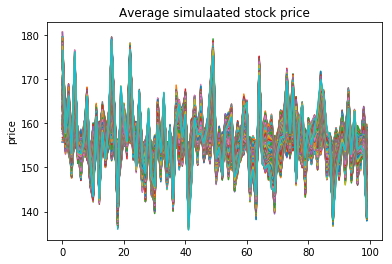

In [8]:
c.n= 10000
c.N = 500
c.build_path()
plt.title('Average simulaated stock price')
plt.ylabel('price')
plt.plot(c.results[:,-100:].T);

# American put Option

In [9]:
ticker = 'AAPL'
strike = 170
maturity = '2018-4-2'
type_ = 'american'
p = put(ticker,strike,maturity,type_='american',check_BS=0)
print('Annualized volatility: {}'.format(c.std))

Summary of past returns for AAPL
count    3641.000000
mean        0.000824
std         0.101214
min        -0.122075
25%        -0.011885
50%        -0.000995
75%         0.008776
max         5.889755
Name: WIKI/AAPL - Close, dtype: float64
std: 1.6064992628750492
stock price: 178.12
Type of derivative: put
Annualized volatility: 0.20838208605987887


In [10]:
p.build_path();
price = p.price();

24.775468939553374
24.524252107930565


In [11]:
p.n=10000
p.N=10000
print('Price {}'.format(p.price()))

26.488592301253505
Price (26.464050225298358, 'nan')


26.689131266311986


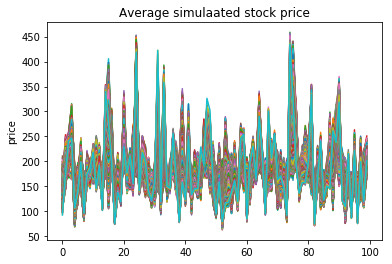

In [12]:
p.n= 10000
p.N = 500
p.build_path()
plt.title('Average simulaated stock price')
plt.ylabel('price')
plt.plot(p.results[:,-100:].T);